In [1]:
import arviz
import os 


os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 

In [10]:
# load results from exp_results folder
import glob
folder = glob.glob('fit_results/*')
exp_data_dict = {}
for f in folder:
    name = f.split('/')[-1]
    if 'idata.nc' in os.listdir(f):
        exp_results = arviz.from_netcdf(f'{f}/idata.nc')
        exp_data_dict[name] = exp_results


In [11]:
from pl_temp_fit.fit_experimental_PLT import pl_trial
import matplotlib.pyplot as plt 

def plot_posterior_prediction(
    idata_mh, truemodel_pl, temperature_list, hws, save_folder="", savefig=True, title="Posterior prediction",selected_chains=[0,1,2,3]
):
    fig = plt.figure(constrained_layout=True,figsize=(15,10))
    subfig =fig.subfigures(1,3)
    ax = [subfig[0].subplots(1,1),subfig[1].subplots(1,1)]
    

    theta_mean = idata_mh.posterior.sel(chain=selected_chains).mean(dim=["chain", "draw"])
    #theta_mean = idata_mh.posterior.mean(dim=["chain", "draw"])

    theta_mean_list = []
    for x in theta_mean.data_vars:
        theta_mean_list.append(
            theta_mean[x].values
        )  # theta_mean = theta_mean.to_dict()["values"]
    print(theta_mean_list)
    data_plot = pl_trial(theta_mean_list, temperature_list, hws)
    data_plot = data_plot.reshape(len(hws), -1)/max(data_plot.reshape(-1, 1))
    data_true_plot = truemodel_pl.reshape(len(hws), -1)/max(truemodel_pl.reshape(-1, 1))
    for i in range(1,len(temperature_list),2):
        ax[0].plot(
            hws,
            data_plot[:, i],
            label="fit" + str(temperature_list[i]) + " K",
            linestyle="-",
            color="C" + str(i),
            alpha=0.5,
        )
        ax[0].plot(
            hws,
            data_true_plot[:, i],
            label="true" + str(temperature_list[i]) + " K",
            linestyle="--",
            color="C" + str(i),
        )
        ax[1].plot(
            hws,
            data_plot[:, i]/max(data_plot[:, i]),
            label="fit" + str(temperature_list[i]) + " K",
            linestyle="-",
            color="C" + str(i),
            alpha=0.5,
        )
        ax[1].plot(
            hws,
            data_true_plot[:, i]/max(data_true_plot[:, i]),
            label="true" + str(temperature_list[i]) + " K",
            linestyle="--",
            color="C" + str(i),
        )
    ax[0].set_xlabel("Photon Energy (eV)")
    ax[0].set_ylabel("PL Intensity (arb. units)")
    fig.suptitle(title)
    ax[0].legend(ncol=len(temperature_list)/2, bbox_to_anchor=(2,-0.1
                                                             ), loc='upper center')
    ax = subfig[2].subplots(5,1)
    # Let's assume you want to select chain 0 and chain 2

    mean_selected_chains = idata_mh.posterior.sel(chain=selected_chains)

    arviz.plot_density(mean_selected_chains, ax=ax)    #ubfig[2].tight_layout()
    fig.tight_layout()
    if savefig:
        fig.savefig(save_folder + "/posterior_mean.png")

def plot_distributions(idata_mh, save_folder="", savefig=False, title="Posterior prediction",selected_chains=[0,1,2,3],ax=None, colors = "",label=""):

    mean_selected_chains = idata_mh.posterior.sel(chain=selected_chains)

    arviz.plot_density(mean_selected_chains, ax=ax,colors=colors,data_labels= [label])    #ubfig[2].tight_layout()#var_names=parameter_name


In [17]:
len([x  for x in list(exp_data_dict.keys()) if 'factor_relative_intensity_loss=1.0' in x ])

15

In [24]:
[list(exp_data_dict.keys())[x].split('factor')[0] for x in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
# green colors if name has IT in it


['Y6_DIB2000 num_tune=1000 sigma=0.1 ',
 'PYIT2000 num_tune=1000 sigma=0.1 ',
 'IDTBR_DIB2000 num_tune=1000 sigma=0.1 ',
 'IEICO2000 num_tune=1000 sigma=0.1 ',
 'IT4F_DIO2000 num_tune=1000 sigma=0.1 ',
 'Y6PVK2000 num_tune=1000 sigma=0.1 ',
 'Y6_DIB2000 num_tune=1000 sigma=0.1 ',
 'Y6_DIO2000 num_tune=1000 sigma=0.1 ',
 'PYIT_PVK2000 num_tune=1000 sigma=0.1 ',
 'ITIC_DIO2000 num_tune=1000 sigma=0.1 ',
 'Y6PVK2000 num_tune=1000 sigma=0.1 ',
 'ITIC2000 num_tune=1000 sigma=0.1 ',
 'Y62000 num_tune=1000 sigma=0.1 ',
 'Y6_SWrecipe2000 num_tune=1000 sigma=0.1 ',
 'Y62000 num_tune=1000 sigma=0.1 ']

/var/tmp/pbs.8575362.pbs/ipykernel_2769436/574741677.py:37: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[0,0].legend(labels,ncol=3, bbox_to_anchor=(1.3, -2.1), loc='lower left',fontsize=14)
/var/tmp/pbs.8575362.pbs/ipykernel_2769436/574741677.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


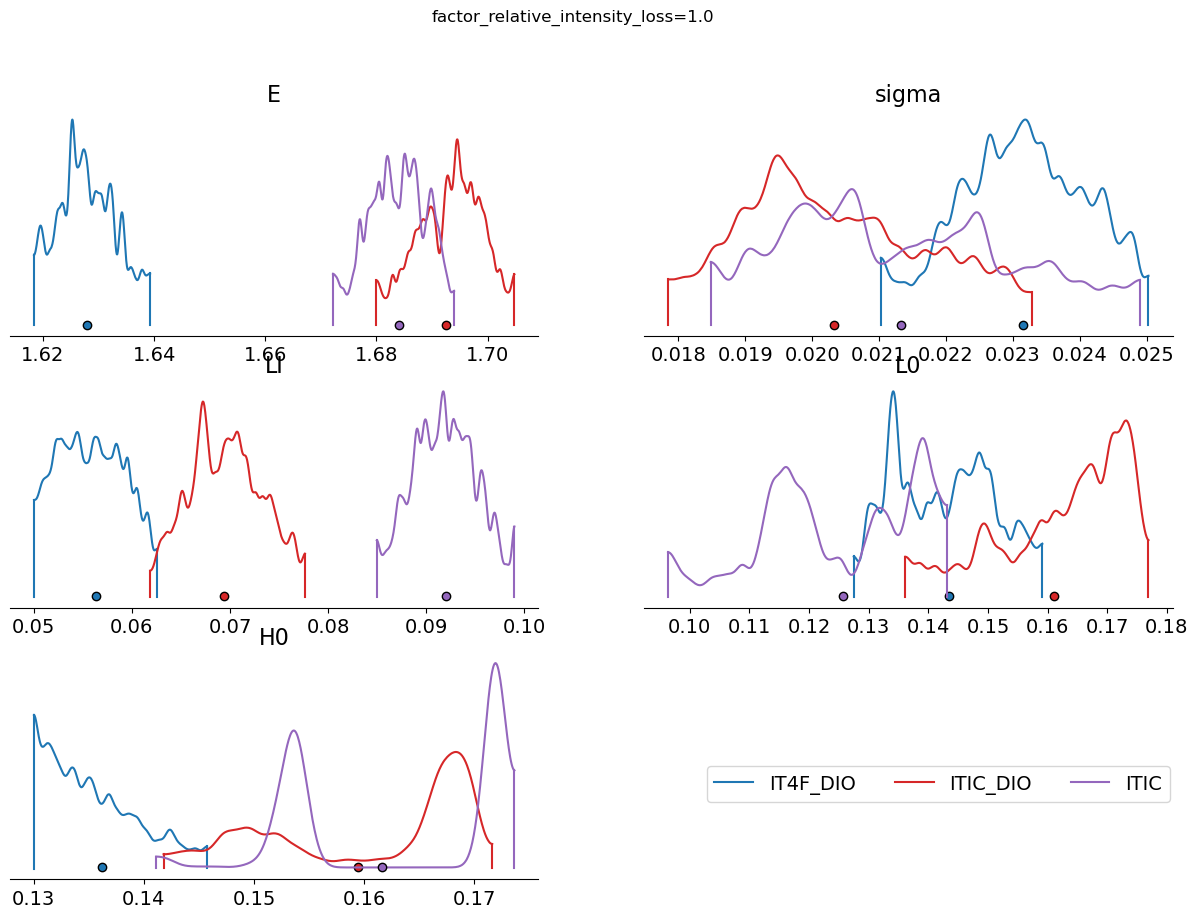

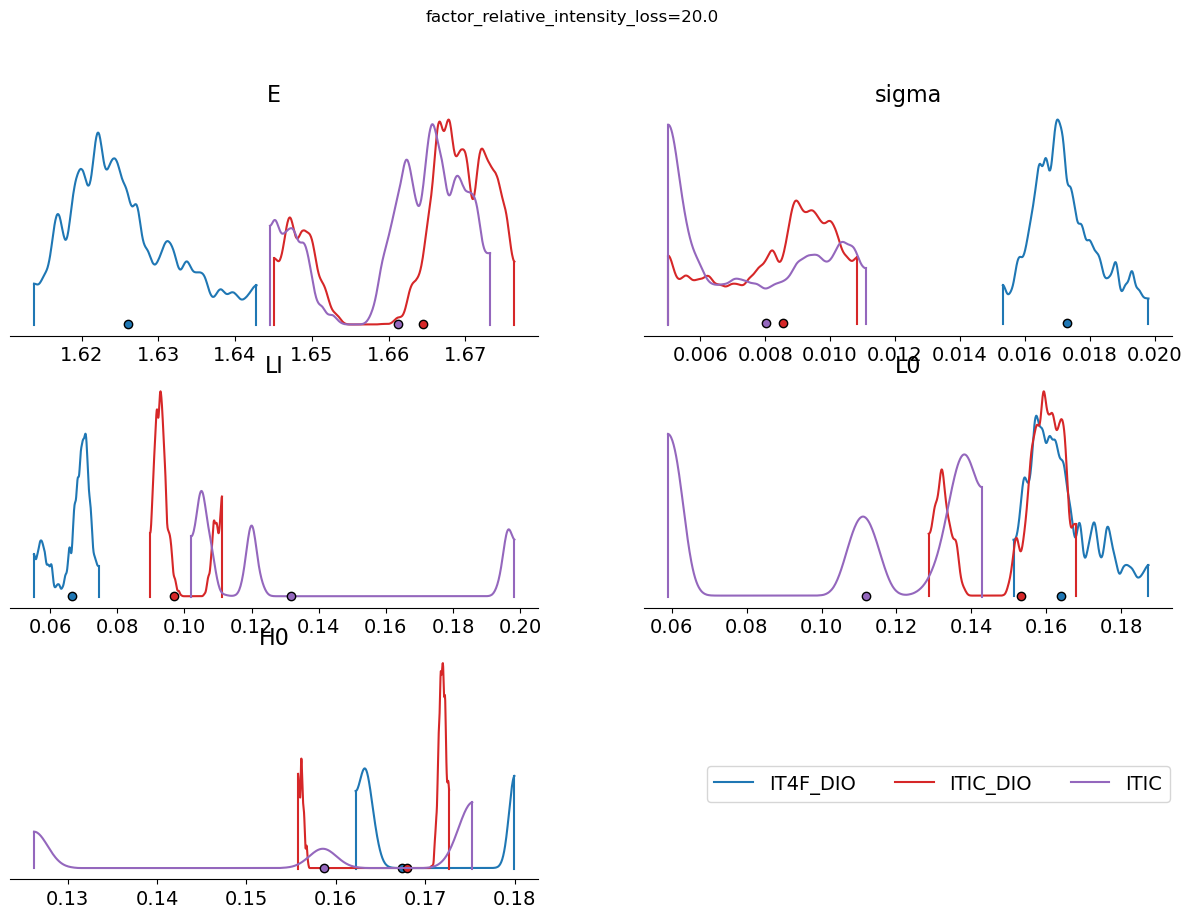

In [38]:
from pl_temp_fit import fit_experimental_PLT 
import importlib
importlib.reload(fit_experimental_PLT)
def plot_all_dist(condition):
    fig, ax = plt.subplots(3,2,figsize=(15,10))
    colors_list = ['C0','C3','C4','C5','C6','C7','C8','C9','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    colors_list_IT = ['#008000', '#006400', '#ADFF2F', '#7CFC00', '#32CD32', '#3CB371', '#228B22', '#008B8B', '#66CDAA', '#7FFFD4']  # Different shades of green
    color_list_Y = ['#0000FF', '#0000CD', '#00008B', '#000080', '#191970', '#1E90FF', '#87CEFA', '#00BFFF', '#4682B4', '#5F9EA0']  # Different shades of blue
    colors_list_other = ['#FF0000', '#CD0000', '#8B0000', '#800000', '#701C1C']  # Different shades of red
    labels = []
    
    #condition = 'factor_relative_intensity_loss=1.0'
    for name in [x.split('factor')[0] for x in list(exp_data_dict.keys()) if 'factor_relative_intensity_loss=1.0' in x ]:#1,2,3,4,5,11,23,26]]:#exp_data_dict.keys():
        name = name + condition#'factor_relative_intensity_loss=1.0'
        if 'num_tune=1000' in name:
            if 'Y' in name or 'L8' in name:
                color = color_list_Y.pop(0)
                
            elif 'IT' in name:
                #color = colors_list_IT.pop(0)
                color = colors_list.pop(0)
                plot_distributions(exp_data_dict[name], save_folder=f'exp_results/{name}', savefig=False, title=name,selected_chains=[0,1,2,3],ax=ax, colors=color)
                labels.append("_")#name.split('2000')[0])
                labels.append("_")
                labels.append(name.split('2000')[0])
                labels.append("_")

            else:
                color = colors_list_other.pop(0)
            

    ax[2,1].set_visible(False)
    # Filter out empty strings from labels
    labels = [label for label in labels if label]
    fig.suptitle(condition)
    #ax[0,0].legend(ncol=4, bbox_to_anchor=(1, -2.5), loc='lower left')
    ax[0,0].legend(labels,ncol=3, bbox_to_anchor=(1.3, -2.1), loc='lower left',fontsize=14)
    fig.tight_layout()
plot_all_dist('factor_relative_intensity_loss=1.0')
plot_all_dist('factor_relative_intensity_loss=20.0')

#neglect emptu legend entries


Y6_SWrecipe2000 num_tune=1000 sigma=0.1 factor_relative_intensity_loss=1.0


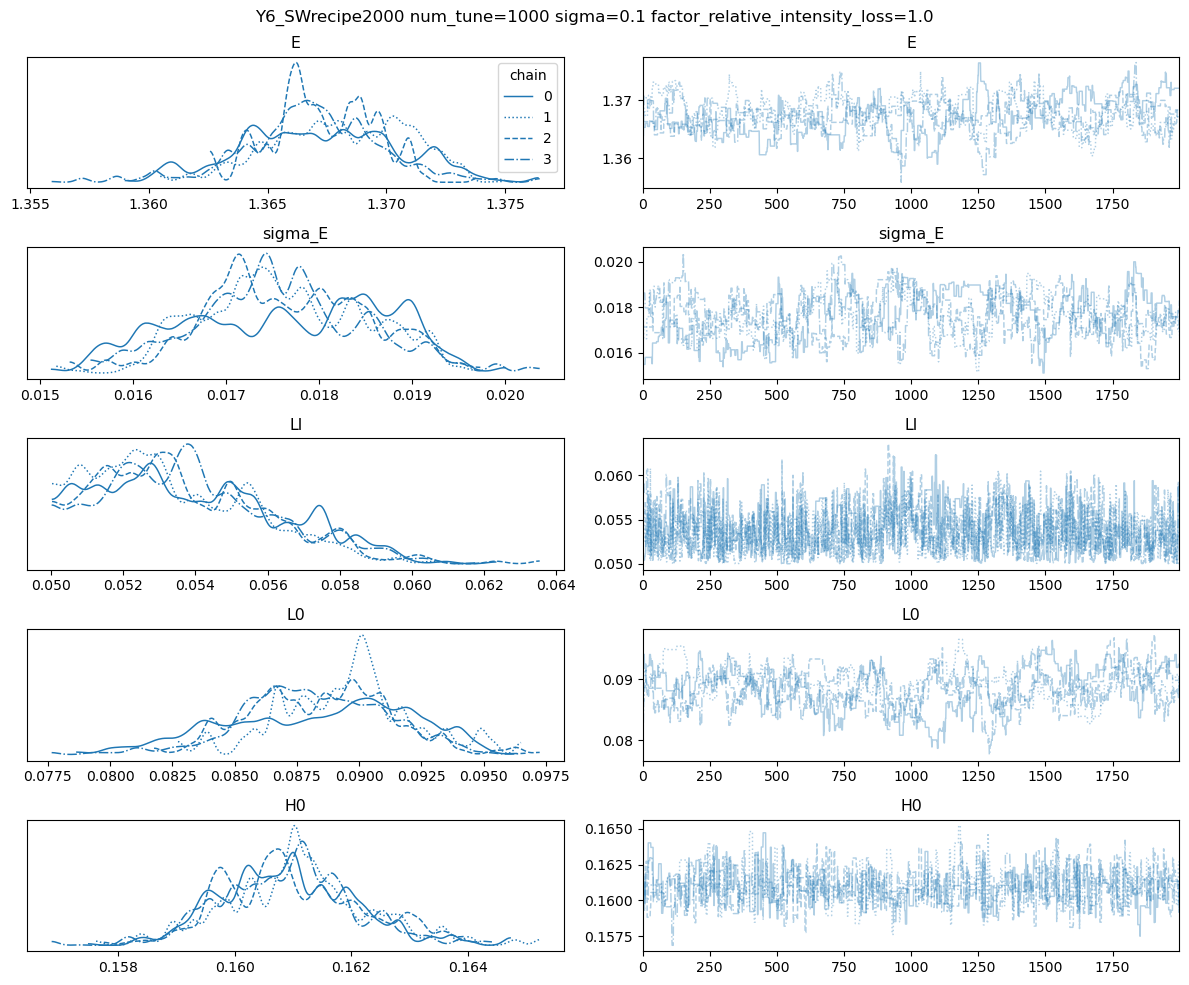

[array(1.36739644), array(0.01762791), array(0.0537209), array(0.08866251), array(0.16097031)]


/var/tmp/pbs.8575362.pbs/ipykernel_2769436/2222016489.py:66: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Y6_SWrecipe2000 num_tune=1000 sigma=0.1 factor_relative_intensity_loss=20.0


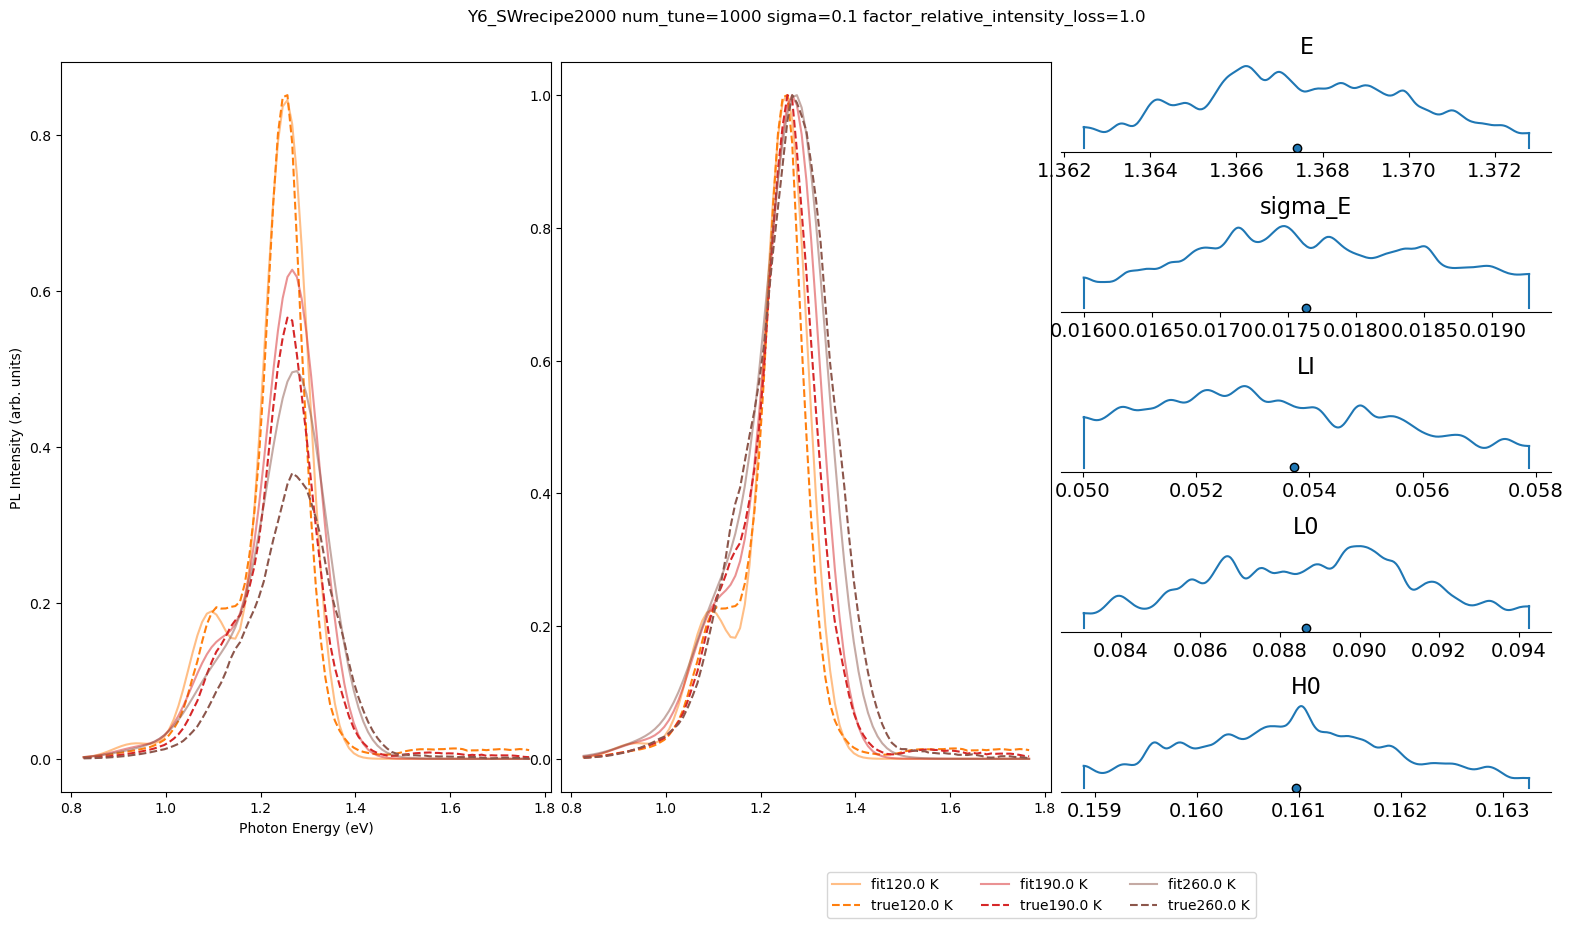

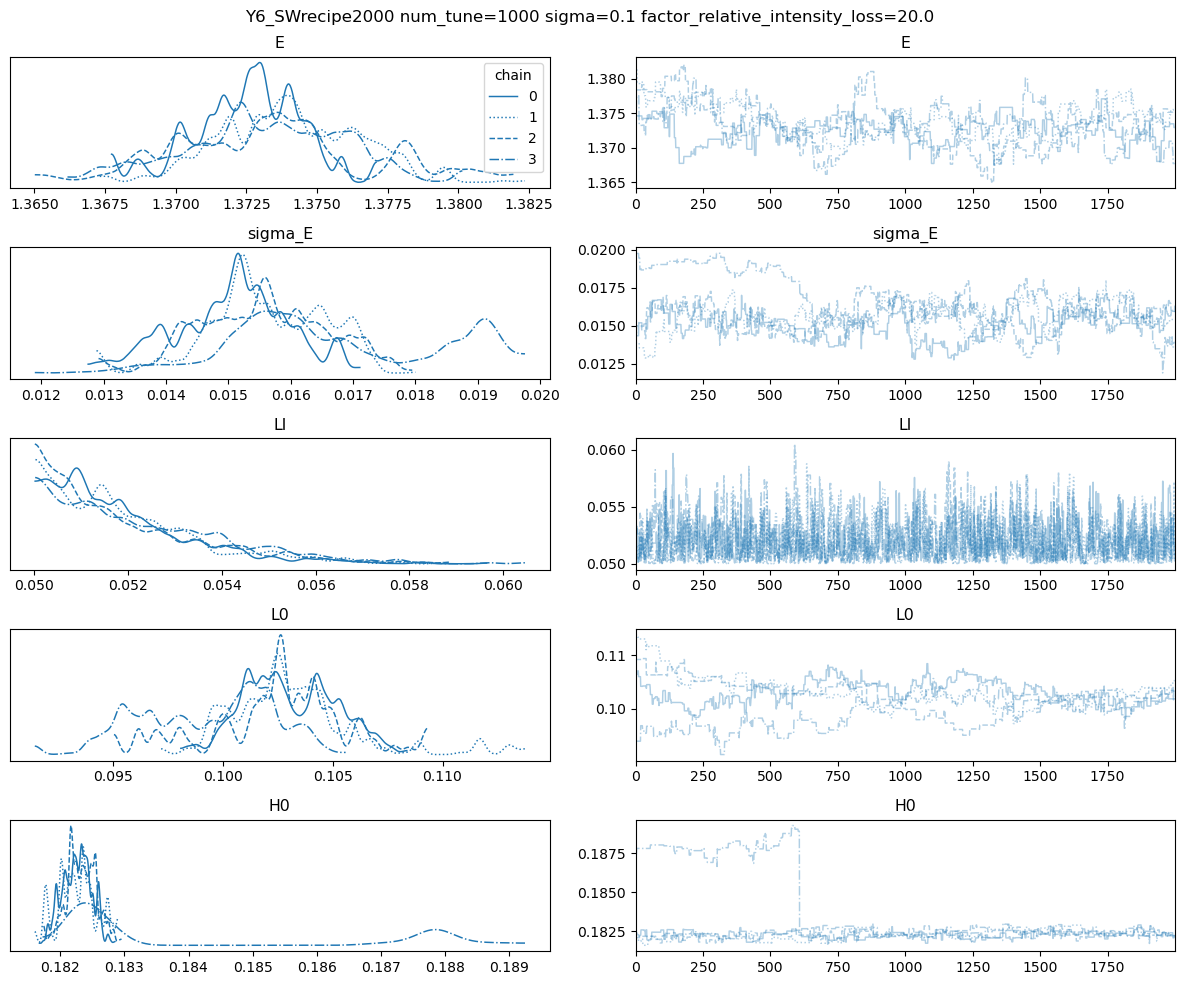

[array(1.37327656), array(0.01574171), array(0.05197854), array(0.10199868), array(0.18273737)]


/var/tmp/pbs.8575362.pbs/ipykernel_2769436/2222016489.py:66: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


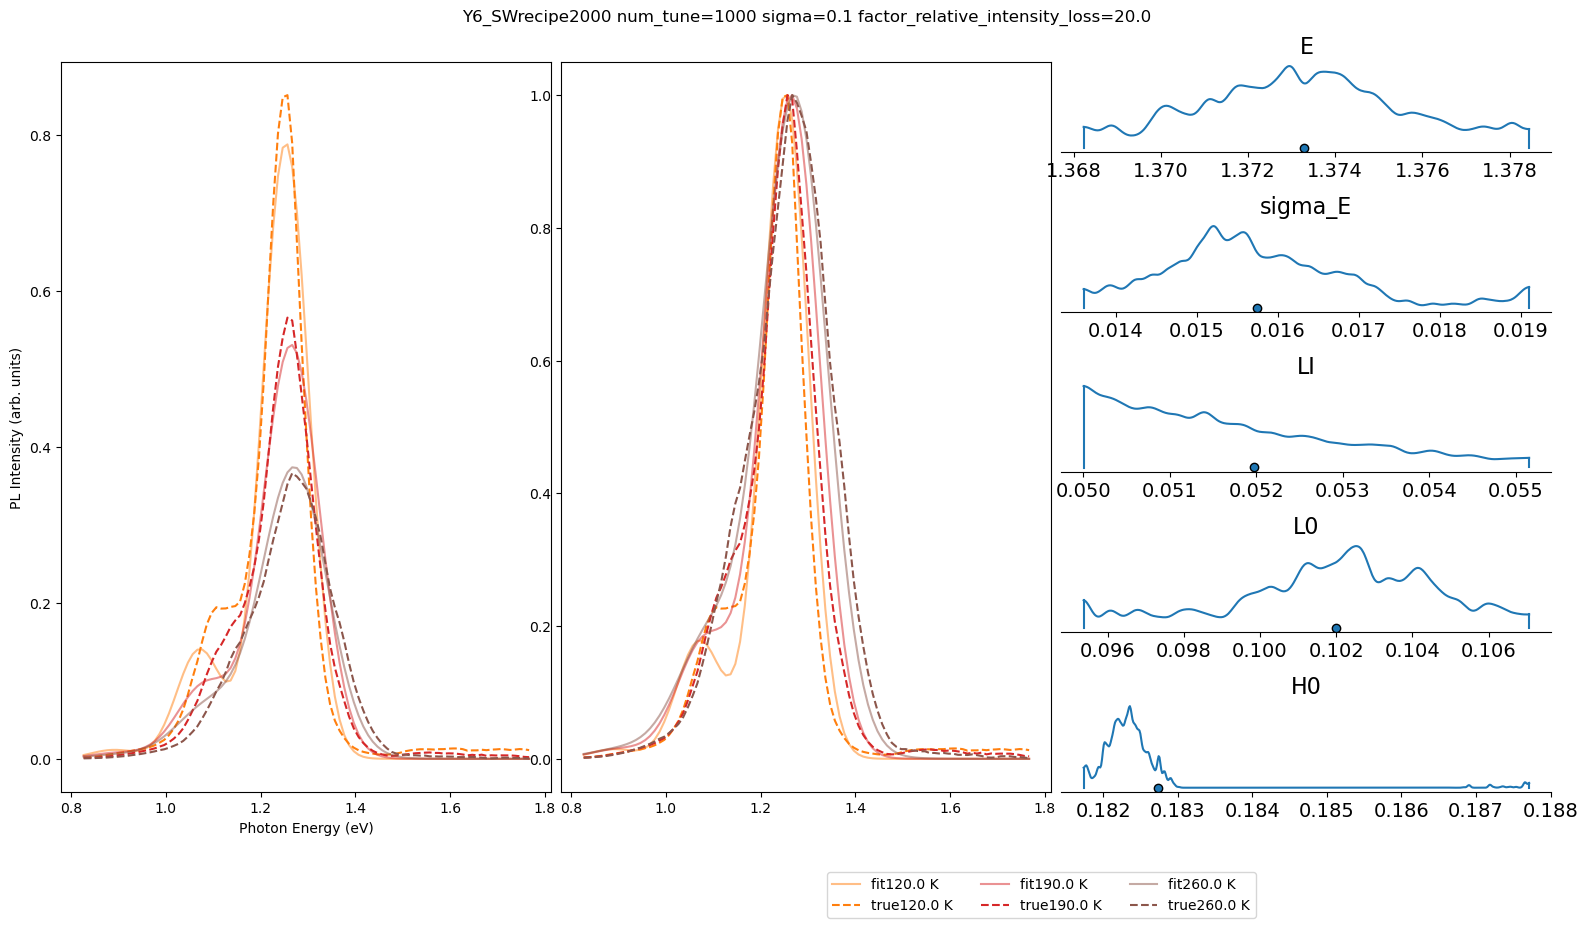

In [8]:
from pl_temp_fit import fit_experimental_PLT 
import importlib
importlib.reload(fit_experimental_PLT)


for name in exp_data_dict.keys():
    if 'factor_relative_intensity_loss' in name and 'Y6' in name and 'num_tune=1000' in name:
        print(name)
        axes = arviz.plot_trace(exp_data_dict[name], legend=True)
        fig = axes.ravel()[0].figure
        fig.suptitle(name)
        fig.tight_layout()
        plt.show()
        selected_chains = input('Select chains to plot (e.g. 0,1,2,3): ')
        selected_chains = list(map(int, selected_chains.split(',')))
        csv_name = name.split('200')[0]
        data_file = f'experiemental_data/{csv_name}.csv'

        truemodel_pl, temperature_list, hws = fit_experimental_PLT.read_data(data_file)
        plot_posterior_prediction(
            exp_data_dict[name],
            truemodel_pl,
            temperature_list,
            hws,
            save_folder = '',
            savefig=False,
            title = name,
            selected_chains=selected_chains
        )
        

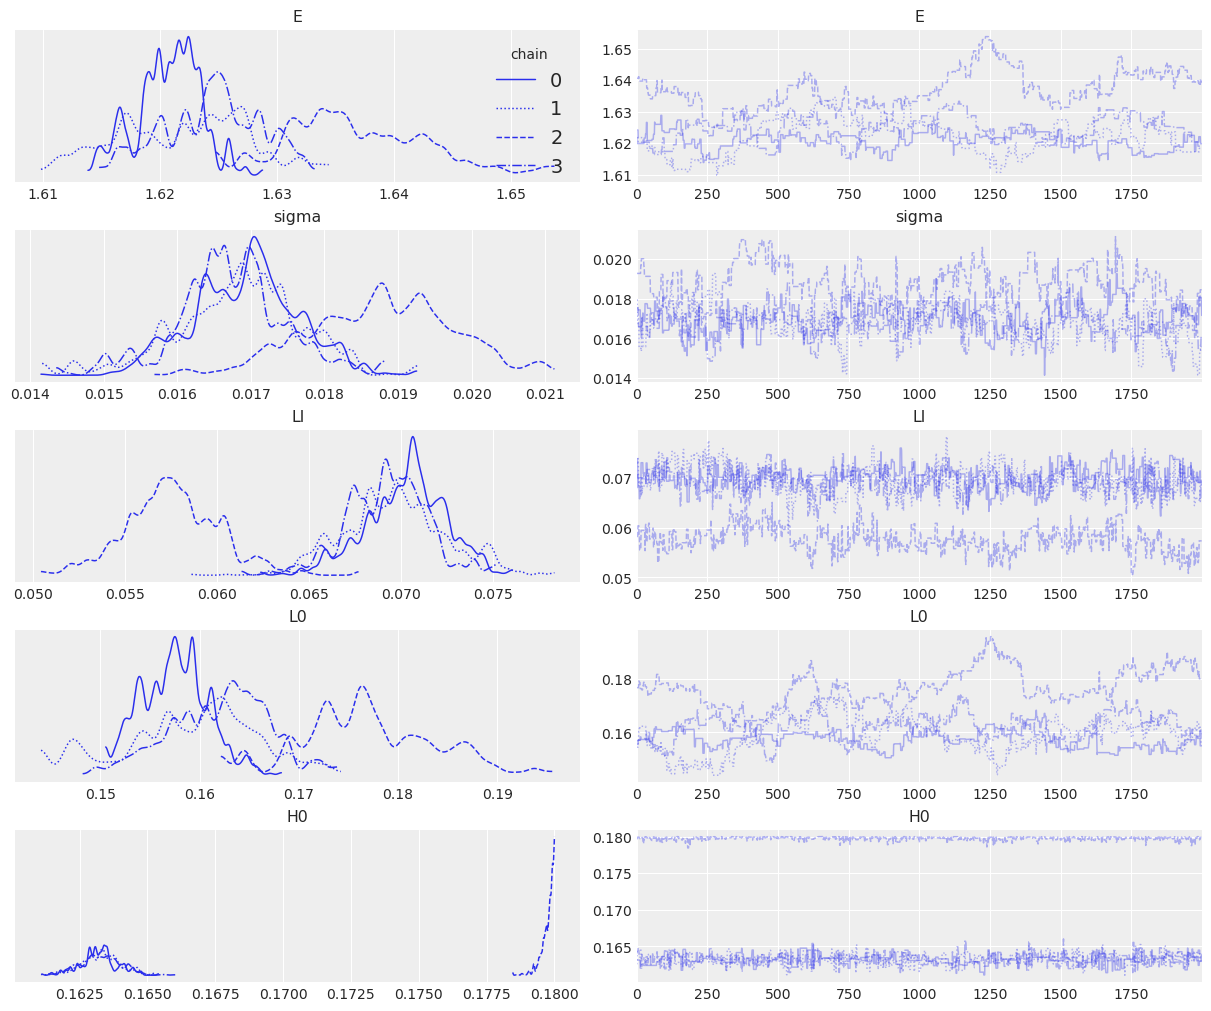

In [149]:
from pl_temp_fit import fit_experimental_PLT 
import importlib
importlib.reload(fit_experimental_PLT)


for name in exp_data_dict.keys():
    if 'factor_relative_intensity_loss' in name and 'IT4F' in name and 'num_tune=1000' in name:
        az.plot_trace(exp_data_dict[name], legend=True)
        fig = axes.ravel()[0].figure
        fig.suptitle(name)
        fig.tight_layout()


In [39]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.special import betaln
from scipy.stats import beta

print(f"Running on PyMC v{pm.__version__}")
az.style.use("arviz-darkgrid")


Running on PyMC v5.9.2


In [41]:
y = np.repeat([1, 0], [50, 50])  # 50 "heads" and 50 "tails"
priors = ((1, 1), (30, 30))

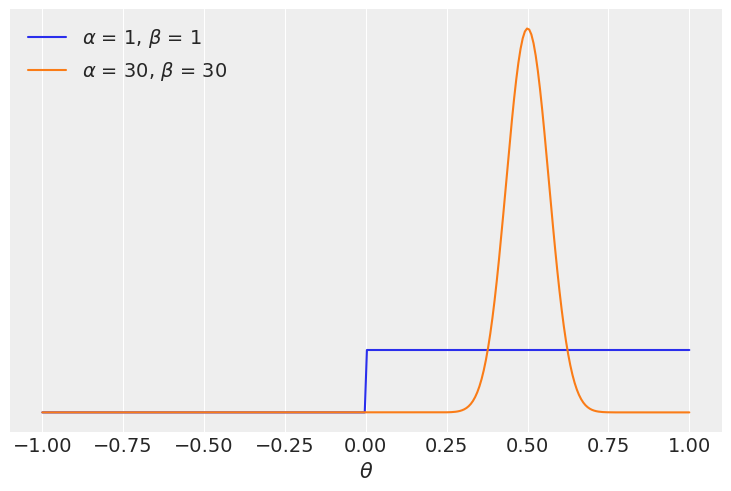

In [59]:
y = np.repeat([1, 0], [50, 50])  # 50 "heads" and 50 "tails"
priors = ((1, 1), (30, 30))
for a, b in priors:
    distri = beta(a, b)
    x = np.linspace(-1, 1, 300)
    x_pdf = distri.pdf(x)
    plt.plot(x, x_pdf, label=rf"$\alpha$ = {a:d}, $\beta$ = {b:d}")
    plt.yticks([])
    plt.xlabel("$\\theta$")
    plt.legend()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [a]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'a'}>

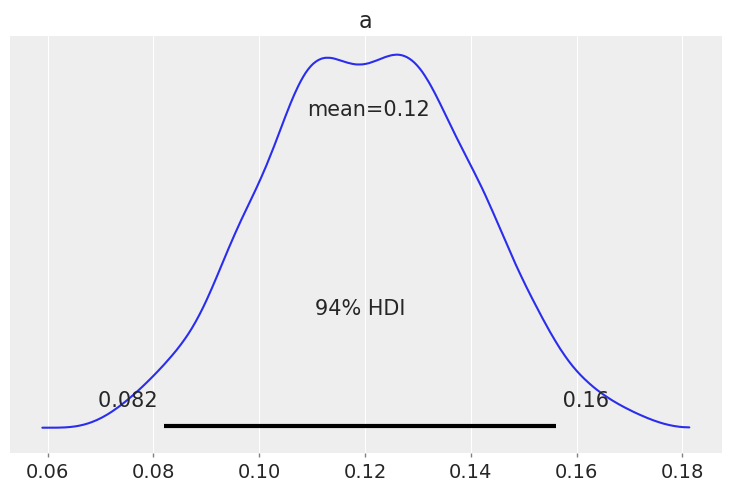

In [74]:
with pm.Model() as model:
    a =  pm.TruncatedNormal('a', mu=0.12, sigma=0.02, lower=0.05,upper=0.2)
    idata = pm.sample(1000, tune=100, cores=1)
az.plot_posterior(idata, var_names=["a"])

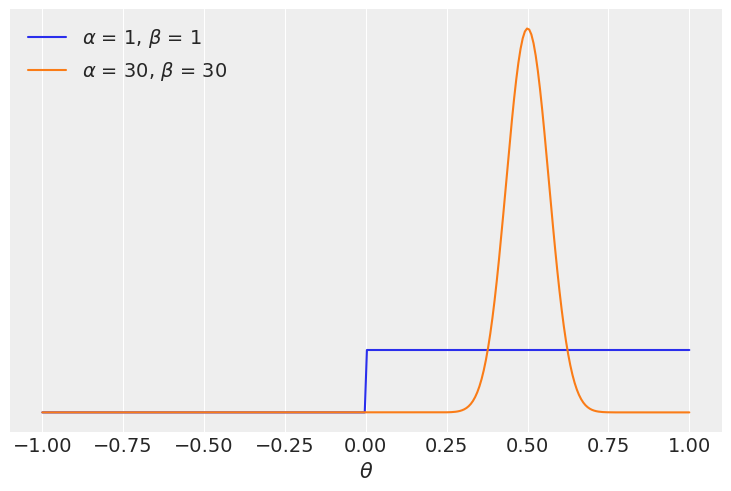

In [32]:
import pymc as pm
import numpy as np
RANDOM_SEED = 58
rng = np.random.default_rng(RANDOM_SEED)
with pm.Model() as model:
        theta = fit_experimental_PLT.define_model_prior(5)
        # use a Potential to "call" the Op and include it in the logp computation
        # Use custom number of draws to replace the HMC based defaults
with model:
    exp_results = pm.sample_posterior_predictive(exp_results,  extend_inferencedata=True, random_seed=rng)
   

In [34]:
exp_results

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    E        (chain, draw) float64 ...
    sigma    (chain, draw) float64 ...
    LI       (chain, draw) float64 ...
    L0       (chain, draw) float64 ...
    H0       (chain, draw) float64 ...
Attributes:
    created_at:                 2023-11-29T13:00:27.259635
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.9.2
    sampling_time:              12711.639404058456
    tuning_steps:               500

In [18]:
az.plot_ppc(exp_results, num_pp_samples=100);


TypeError: `data` argument must have the group "posterior_predictive" for ppcplot